# From neuron to neural net

Last time, we looked at a single neuron. We discussed the parallels between that neuron with two weights and linear regression. As we add more features (columns in our X matrix) we can add more neurons.

## Activation Functions

But, as we add neurons, each neuron is still mostly functioning like linear regression. The next thing we can add to our neuron is an **activation function**. Activation functions adjust the output of a neuron by adding some function before the final output. Below are the "linear" activation function that we have modeled so far, plus the more common **ReLU (Rectified Linear Unit)** and **Sigmoid** activation functions.

![Diagrams of the linear, ReLU and Sigmoid activation functions](images/Activation_function_diagrams.png)


Again, the activation function is applied to the output of a neuron and is a hyperparameter of the model. In practice, while layers may use different activation functions, the same function is applied to **all neurons** of each layer. Below is a single neuron, with the a couple possible activation functions.

![Diagram of a neuron with activation function](images/Activation_function.png)

## Layers

As we get multiple neurons, we need some way of coordinating their output, so we can add a layer to gather the output from multiple neurons into the needed number of outputs (more on that later). But the other thing that layers do is allow deeper networks with multiple layers, each selected for functional or empirical reasons. This is where deep learning gets its name--as networks grow to have more and more layers of neurons, we refer to them as deep networks--there is no agreed upon cutoff here...more than three???

![A two layer neural network](images/Neural_network.png)

In [1]:
#previously adding moe neurons will only be used to model linear functions. The idea is to model non linear functions
#not transformaing not activaiton function - non linear
#reLU if activaiton si 0 set to aero and move if not pass it n and move on works similair ot hyperbolic tangent function
#tanH hyperbolbic tangent to transform the data
#signmoid function
# in the bleu image  nwo we are connecting each neuron to multiple networks 
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('data/diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Get our X and y
X = df.drop(columns='Outcome')
y = df['Outcome']


In [6]:
# Scale data - mean 0 std dev 1, Is this to make the data linear?
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [20]:
# binary option for signmoid works
# Setup our model
# 1 Dense layer with 8 neurons, 1 Dense layer with 1 neuron and sigmoid
# Sigmoid used for binary classification


model = keras.Sequential([
    layers.Dense(8, input_dim=8, activation='relu'), # 8 activaiton layers seen by input_dim=8
    layers.Dense(1, activation='sigmoid') #signmoid was added due to being a binaray option
    ])




# Print model summary
model.summary()

#8 neurons 8 layers + bias dense 2, dense 3 1 activaiton layer and bias = 9, one neuron wit hsignmoid option with vairiaotn between 1 and 0 works well

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [21]:
# softmax doe snto work well with binary options? signmoid optiosn is much  bettee. More than two categories (yes no maybe) softmax works gives a range betwen 0 and 1 but can also give an option 
# Setup our model
# 1 Dense layer with 8 neurons, 1 Dense layer with 1 neuron and sigmoid
# Sigmoid used for binary classification


#model = keras.Sequential([
#    layers.Dense(8, input_dim=8, activation='relu'), # 8 activaiton layers seen by input_dim=8
#    layers.Dense(1, activation='softmax') #signmoid was added due to being a binaray option, you get two straight lines as a n option for soem reason
#    ])




# Print model summary
# model.summary()


In [22]:
# Set some model hyperparameters
from tensorflow.keras.optimizers import Adam

lr = 0.001  # Set the learning rate. Start with default for Adam, 0.001, this si multiple layers in order to get otu of moving layers
optimizer = Adam(learning_rate=lr)  # Set the optimizer. Start with adam.

# Compile the model--a necessary step with Keras models
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [23]:
# Now we can fit the model
# Let's also save the training history for plotting

history = model.fit(X, y, epochs=150, validation_split=0.25, batch_size=10, verbose=0) # Here train test split was doen with 25 % for vailuationa dn 75% for training  can do trian test plit earlier as an alaternative option



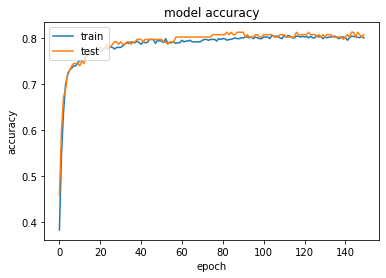

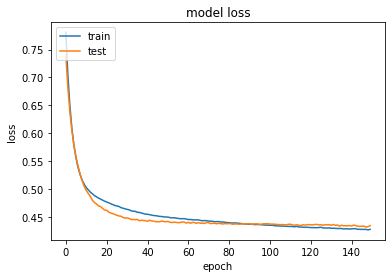

In [24]:
# Make some nice plots

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#history will change, In model loss if test goues up then this means that the 

# Experimentation

Using what you know so far, try to make the best possible model to predict diabetes with these data.

Things to try:

* Try normalizing data (all values between 0 and 1)
    ```python
    # Normalize data - all between 0 and 1
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    ```
* Adding layers
* Adjusting the number of neurons per layer (you do need to get back to 1 with a sigmoid activation at the end)
* Different activation functions
* Adjusting the number of epochs
* Adjusting learning rate


In [26]:
#tesitng hyperparameters, best test accuracy
#Try normalizing data (all values between 0 and 1)
# Normalize data - all between 0 and 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [27]:
# binary option for signmoid works
# Setup our model
# 1 Dense layer with 8 neurons, 1 Dense layer with 1 neuron and sigmoid
# Sigmoid used for binary classification


model = keras.Sequential([
    layers.Dense(8, input_dim=8, activation='relu'), # 8 activaiton layers seen by input_dim=8
    layers.Dense(1, activation='sigmoid') #signmoid was added due to being a binaray option
    ])




# Print model summary
model.summary()

#8 neurons 8 layers + bias dense 2, dense 3 1 activaiton layer and bias = 9, one neuron wit hsignmoid option with vairiaotn between 1 and 0 works well

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Set some model hyperparameters
from tensorflow.keras.optimizers import Adam

lr = 0.001  # Set the learning rate. Start with default for Adam, 0.001, this si multiple layers in order to get otu of moving layers
optimizer = Adam(learning_rate=lr)  # Set the optimizer. Start with adam.

# Compile the model--a necessary step with Keras models
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [33]:
# Now we can fit the model
# Let's also save the training history for plotting

history = model.fit(X, y, epochs=150, validation_split=0.25, batch_size=10, verbose=0) # Here train test split was doen with 25 % for vailuationa dn 75% for training  can do trian test plit earlier as an alaternative option



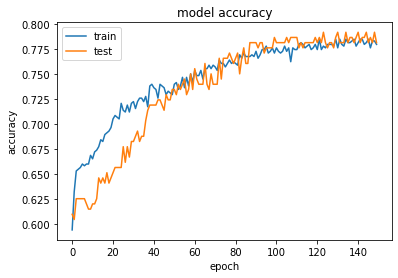

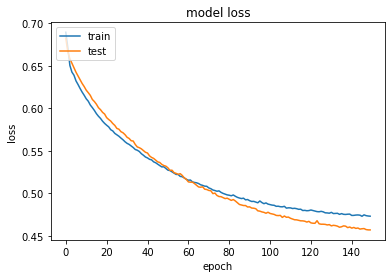

In [30]:
# Make some nice plots

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#history will change, In model loss if test goues up then this means that the 

In [68]:
#tesitng hyperparameters, best test accuray Normalizing the data helps out so include it
#Try normalizing data (all values between 0 and 1)
# Normalize data - all between 0 and 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [73]:
#Adding layers and adjsiting numebr of neurons, increasing the numebr of neurosn does not appear to elp
# binary option for signmoid works
# Setup our model
# 1 Dense layer with 8 neurons, 1 Dense layer with 1 neuron and sigmoid
# Sigmoid used for binary classification


model = keras.Sequential([
    layers.Dense(8, input_dim=8, activation='relu'), # Additona of another input layer activaiton layers seen by input_dim=8 #doubleyer the amount of layers
    layers.Dense(4, activation='relu'), # 7 activaiton layers seen by input_dim=8 #doubleyer the amount of layers
    layers.Dense(1, activation='sigmoid') #signmoid was added due to being a binaray option
    ]) # turnign on or off certain optimizers can hlep




# Print model summary
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_55 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Set some model hyperparameters
from tensorflow.keras.optimizers import Adam

lr = 0.001  # Set the learning rate. Start with default for Adam, 0.001, this si multiple layers in order to get otu of moving layers
optimizer = Adam(learning_rate=lr)  # Set the optimizer. Start with adam.

# Compile the model--a necessary step with Keras models
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [75]:
# Now we can fit the model
# Let's also save the training history for plotting

history = model.fit(X, y, epochs=150, validation_split=0.25, batch_size=10, verbose=0) # Here train test split was doen with 25 % for vailuationa dn 75% for training  can do trian test plit earlier as an alaternative option
#batch size chaning 


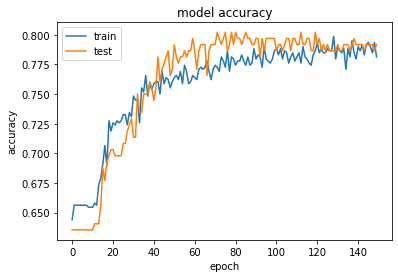

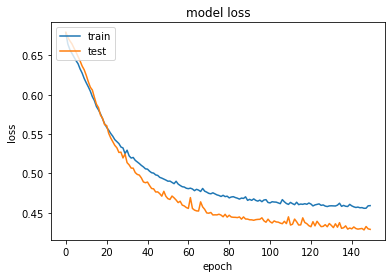

In [76]:
# Make some nice plots

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#history will change, In model loss if test goues up then this means that the 